
# EE675A - Assignment 3

**Name:** Rahul Narayan  <br />
**Roll No:** 210806
***
## Instructions

- Kindly name your submission files as `RollNo_Name_A1_PartB.ipynb`, based on the part you are submitting. Marks will be deducted for all submissions that do not follow the naming guidelines. <br />
- You are required to work out your answers and submit only the iPython Notebook. The code should be well commented and easy to understand as there are marks for this. This notebook can be used as a template for assignment submission. <br />
- Submissions are to be made through HelloIITK portal. Submissions made through mail will not be graded.<br />
- Answers to the theory questions if any should be included in the notebook itself. While using special symbols use the $\LaTeX$ mode <br />
- Make sure your plots are clear and have title, legends and clear lines, etc. <br />
- Plagiarism of any form will not be tolerated. If your solutions are found to match with other students or from other uncited sources, there will be heavy penalties and the incident will be reported to the disciplinary authorities. <br />
- In case you have any doubts, feel free to reach out to TAs for help. <br />


## Part-A (Deadline - 20th April 2024)

**(Cart Pole Balancing using Policy Gradient: REINFORCE)** [20 Marks] Through this Cart Pole balancing exercise we will learn policy gradient algorithms. Consider the cart-pole problem where a pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart. For information about the observation\_space, action\_space and rewards of the environment refer the cart pole documentation.


For this part implement the policy gradient algorithm REINFORCE as shown below in the figure. You are required to use a **linear policy** (say parameterized by $\textbf{$\theta = [\theta_1 \theta_2]^{\top}$}$ , a $2\times4$ matrix for the cart pole problem) of state $s$ passing through a softmax i.e.  
$\begin{equation}
\pi(a|s,\theta) = softmax(\theta .s) = [exp(\theta_1^{\top}s)      exp(\theta_2^{\top}s)]^{\top}/(exp(\theta_1^{\top}s) + exp(\theta_2^{\top}))
\end{equation} $

##### 1. Write the expression for the gradient $\Delta ln(\pi(A_t|S_t,\theta)$ for the policy shown above(write in $\LaTeX$ in the jupyter-notebook submission[2 Marks]

let a = $
\begin{bmatrix}
1 \\
1 \\
\end{bmatrix}
$ then,       
$
\Delta \ln(\pi(A_t|S_t,\boldsymbol{\theta})) =[a-\pi(A_t|S_t,\boldsymbol{\theta})].S_t^{\top}
$

In [ ]:
!pip install gymnasium

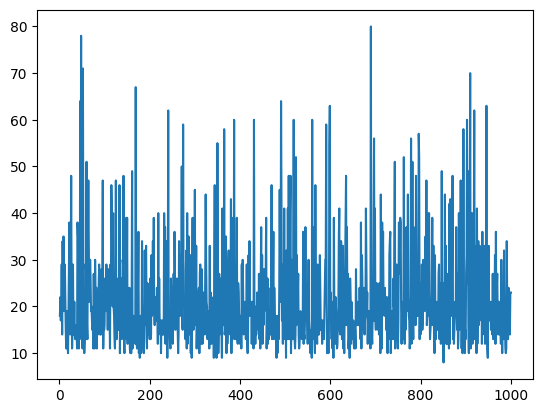

In [ ]:
import gymnasium as gym
import pygame
import tqdm
import math
import numpy as np
import random
import matplotlib.pyplot as plt

def clip_function(grads, max_norm):
    norm = np.linalg.norm(grads)
    if norm > max_norm:
        clipped_grads = grads * (max_norm / norm)
    else:
        clipped_grads = grads
    return clipped_grads


def policy_parametrization(theta,s):
    #print(theta)
    theta = np.matrix(theta)
    s = np.matrix(s)
    theta1 = clip_function(theta[0], 1)
    theta2 = clip_function(theta[1], 1)
    exp1 = np.exp(np.dot(theta1,s))
    exp2 = np.exp(np.dot(theta2,s))
    ele1 = exp1/(exp1 + exp2)
    ele2 = exp2/(exp1 + exp2)
    result = np.concatenate((ele1,ele2),axis=0)
    return result

def del_of_policy_parametrization(theta, s):
    theta = np.matrix(theta)
    s = np.matrix(s)
    theta1 = clip_function(theta[0], 1)
    theta2 = clip_function(theta[1], 1)
#     theta1 = theta[0]
#     theta2 = theta[1]
    exp1 = np.exp(np.dot(theta1,s))
    exp2 = np.exp(np.dot(theta2,s))
    a = (1 - (exp1/(exp1 + exp2)))
    b = (1 - (exp2/(exp1 + exp2)))
    l = np.concatenate((a,b),axis=0)
    #print(np.dot(np.transpose(l),np.transpose(s)))
    return clip_function(np.dot(l,np.transpose(s)), 1)

def G(t, T, gamma, reward):
    G = 0
    for k in range(t+1,T):
        G = G + ((gamma**(k-t-1))*reward[k-1])
    return G

def get_action(policy):
    action = np.random.uniform(low=0,high=1,size=1)[0]
    if action >= policy[0]:
        a = 1
    else:
        a = 0
    return a


env = gym.make("CartPole-v1",render_mode="rgb_array")



alpha = 0.001

gamma = 0.3
env.reset()
obs_space = env.reset()
initial_observation = obs_space
s = np.transpose((np.matrix(initial_observation[0])))

reward_array = np.zeros(1000)
comp_reinforce = np.zeros(1000)
T = 500
theta = np.zeros((2,4))
for i in range(1000):
    env.reset()
    obs_space = env.reset()
    initial_observation = obs_space
    s = np.transpose((np.matrix(initial_observation[0])))
    done = False
    total_reward = 0
    reward = np.array([])
    action = np.array([])
    s_array = np.reshape(s,[1,4])
    t = 0
    while not done:
        env.render()
        #print(policy_parametrization(theta,s))
        obs, rew, done, *info = env.step(get_action(policy_parametrization(theta,s)))
        #print(obs)
        obs = np.matrix(obs)
        #obs= env.step(get_action(policy_parametrization(theta,s)))
        s = np.transpose((np.matrix(obs[0])))
        total_reward += rew
        reward = np.append(reward,rew)
        action = np.append(action,get_action(policy_parametrization(theta,s)))
        s_trans = np.reshape(s,[1,4])
        s_array = np.concatenate((s_array,s_trans),axis=0)

        if t<T:
            done = done
        else:
            done = True

    for u in range(len(action)):
        #print('ssss',np.transpose(s_array[u]))
        delta = del_of_policy_parametrization(theta, np.transpose(s_array[u]))
        #print(delta)
        if action[u]==1:
            theta[1] = (theta + alpha*(gamma**u)*G(u, len(action), gamma, reward)*delta)[1]
        else:
            theta[0] = (theta + alpha*(gamma**u)*G(u, len(action), gamma, reward)*delta)[0]

    reward_array[i] = total_reward
    #print(theta)

comp_reinforce = reward_array
x = [i+1 for i in range(1000)]
plt.plot(x,reward_array)
plt.show()

env.close()


/usr/local/lib/python3.10/dist-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


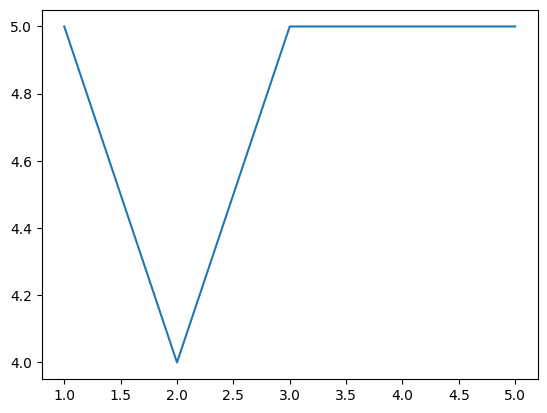

In [ ]:
reward_over_5 = np.zeros(5)
for i in range(5):
    env.reset()
    obs = env.observation_space
    done = False
    total_reward = 0
    t = 1
    while not done:
        env.render()
        obs, rew, done, *info = env.step(get_action(policy_parametrization(theta,s)))
        obs= env.step(get_action(policy_parametrization(theta,s)))
        s = np.transpose((np.matrix(obs[0])))
        total_reward += rew
    reward_over_5[i] = total_reward
x_array = [i+1 for i in range(5)]

plt.plot(x_array, reward_over_5)
plt.show()

<ipython-input-12-7652e5918577>:131: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = w + alpha_w*float(del_small)* np.transpose(s_array[u])
<ipython-input-12-7652e5918577>:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[0] = (theta + alpha_t*(gamma**u)*float(del_small)*delta)[0]
<ipython-input-12-7652e5918577>:135: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[1] = (theta + alpha_t*(gamma**u)*float(del_small)*delta)[1]
<ipython-input-12-7652e591857

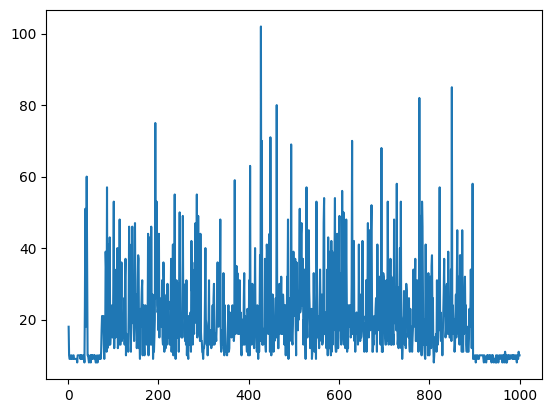

In [ ]:
import gymnasium as gym
import pygame
import tqdm
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import decimal


def clip_function(grads, max_norm):
    norm = np.linalg.norm(grads)
    if norm > max_norm:
        clipped_grads = grads * (max_norm / norm)
    else:
        clipped_grads = grads
    return clipped_grads


def policy_parametrization(theta,s):
    #print(theta)
    theta = np.matrix(theta)
    s = np.matrix(s)
    theta1 = clip_function(theta[0], 5)
    theta2 = clip_function(theta[1], 5)

#     print('n', np.shape(np.dot(theta1,s)))
    exp1 = np.exp(np.dot(theta1,s))
    exp2 = np.exp(np.dot(theta2,s))
    ele1 = exp1/(exp1 + exp2)
    ele2 = exp2/(exp1 + exp2)
    result = np.concatenate((ele1,ele2),axis=0)
    return result



def del_of_policy_parametrization(theta, s):
    theta = np.matrix(theta)
    s = np.matrix(s)
    theta1 = clip_function(theta[0], 5)
    theta2 = clip_function(theta[1], 5)
#     theta1 = theta[0]
#     theta2 = theta[1]
#     print(f"for theta1 = {theta1}, for theta2 = {theta2}")
    exp1 = np.exp(np.dot(theta1,s))
    exp2 = np.exp(np.dot(theta2,s))
#     print(f"theta1 = {theta1}, exp1 = {exp1}, exp2 = {exp2}")
    a = (1 - (exp1/(exp1 + exp2)))
    b = (1 - (exp2/(exp1 + exp2)))
    l = np.concatenate((a,b),axis=0)
    #print(np.dot(np.transpose(l),np.transpose(s)))

    return clip_function(np.dot(l,np.transpose(s)), 1)

def G(t, T, gamma, reward):
    G = 0
    for k in range(t+1,T):
        G = G + ((gamma**(k-t-1))*reward[k-1])
    return G

def get_action(policy):
    action = np.random.uniform(low=0,high=1,size=1)[0]
    if action >= policy[0]:
        a = 1
    else:
        a = 0
    return a




#def reward_alpha(alp, gam):
alpha_w = 1.2
alpha_t = 1.2

gamma = 0.7
#env.reset()
#obs_space = env.reset()
#initial_observation = obs_space
#s = np.transpose((np.matrix(initial_observation[0])))

w = np.zeros((4,1))

reward_array2 = np.zeros(1000)
comp_baseline = np.zeros(1000)
T = 500
theta = np.zeros((2,4))
for i in range(1000):
    env.reset()
    obs_space = env.reset()
    initial_observation = obs_space
    s = np.transpose((np.matrix(initial_observation[0])))
    done = False
    total_reward = 0
    reward = np.array([])
    action = np.array([])
    s_array = np.reshape(s,[1,4])
    t = 0
    while not done:
        env.render()
        #print(policy_parametrization(theta,s))
        obs, rew, done, *info = env.step(get_action(policy_parametrization(theta,s)))
        obs = np.matrix(obs)
        #obs= env.step(get_action(policy_parametrization(theta,s)))
        s = np.transpose((np.matrix(obs[0])))
        total_reward += rew
        reward = np.append(reward,rew)
        action = np.append(action,get_action(policy_parametrization(theta,s)))
        s_trans = np.reshape(s,[1,4])
        s_array = np.concatenate((s_array,s_trans),axis=0)
        #s_a = np.concatenate((s[0][t],s[1][t],s[2][t],s[3][t]),axis=1)
        #print(s+5)
        #print('l',s[:][t])
        t=t+1
        #print('s',s_array)
      #  print(done)
        if t<T:
            done = done
        else:
            done = True
   # print('aray',s_array)
    #print(np.shape(reward))
    #print(reward[2])
    #print(len(action))
    for u in range(len(action)):
        #print('ssss',np.transpose(s_array[u]))
        delta = del_of_policy_parametrization(theta, np.transpose(s_array[u]))
        #print(delta)
        V_s_w = np.dot(np.transpose(w), np.transpose(s_array[u]))
        del_small =G(u, len(action), gamma, reward)-V_s_w
        w = w + alpha_w*float(del_small)* np.transpose(s_array[u])
        if action[u]==1:
#             change = 5 + alpha_t*(gamma**u)*float(del_small)*delta
#             print(change)
            theta[1] = (theta + alpha_t*(gamma**u)*float(del_small)*delta)[1]
        else:
#             change = 5 + alpha_t*(gamma**u)*float(del_small)*delta
#             print(change)
            theta[0] = (theta + alpha_t*(gamma**u)*float(del_small)*delta)[0]

    reward_array2[i] = total_reward
    #print(theta)

comp_baseline = reward_array2
x = [i+1 for i in range(1000)]
plt.plot(x,reward_array2)
plt.show()

env.close()


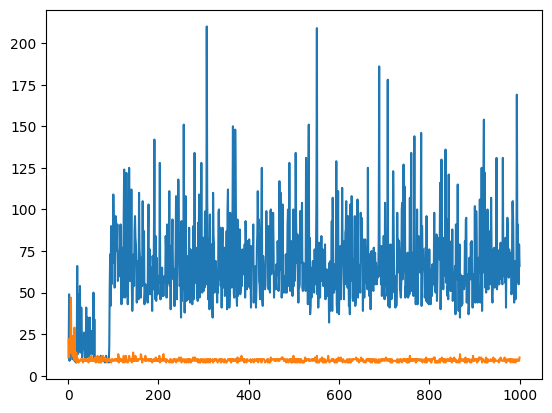

In [ ]:
comp_baseline = reward_array2
comp_reinforce = reward_array
x = [i+1 for i in range(1000)]
plt.plot(x,reward_array2)
plt.plot(x,reward_array)

plt.show()

In [ ]:
import gymnasium as gym
env = gym.make("CartPole-v1")
env.reset()
obs = env.observation_space
print(obs)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [ ]:
print(np.shape(np.matrix(initial_observation[0])))

(1, 4)
